In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
print('Number of passengers in train dataset: ' + str(len(train)))

Number of passengers in train dataset: 891


<Axes: xlabel='Survived', ylabel='count'>

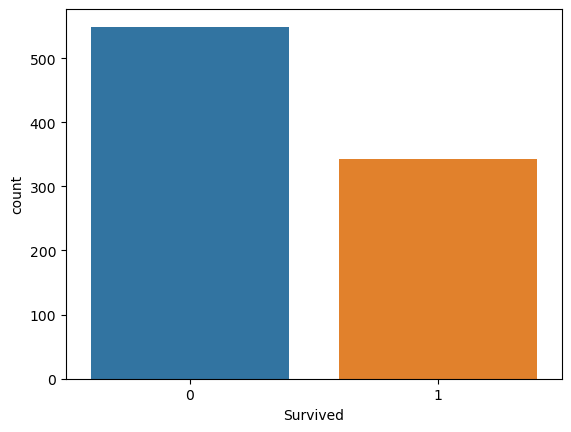

In [13]:
sns.countplot(x = 'Survived', data = train)

<Axes: xlabel='Survived', ylabel='count'>

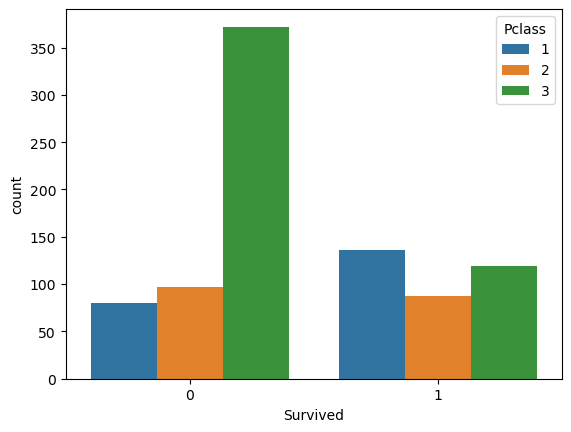

In [14]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

<Axes: ylabel='Frequency'>

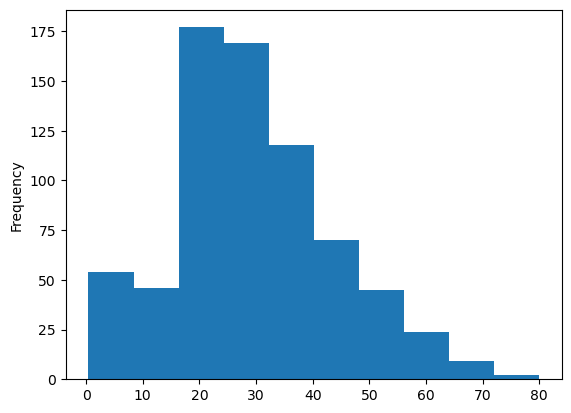

In [15]:
train['Age'].plot.hist()

<Axes: ylabel='Frequency'>

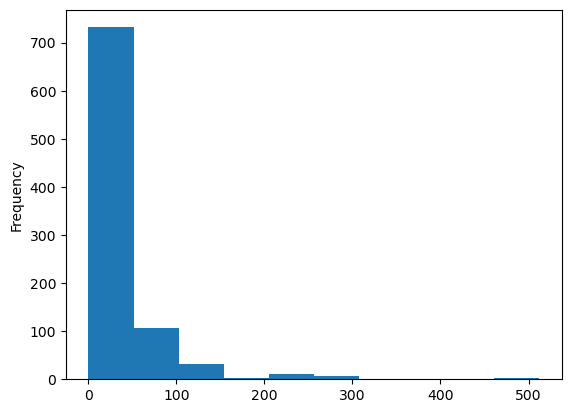

In [16]:
train['Fare'].plot.hist()


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Number of siblings / spouses aboard the Titanic

<Axes: xlabel='SibSp', ylabel='count'>

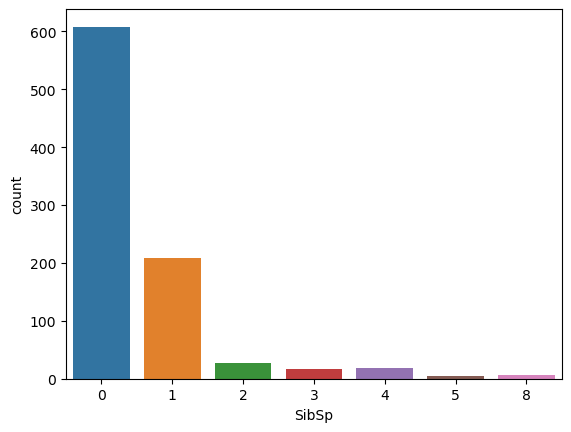

In [18]:
sns.countplot(x = 'SibSp', data = train)

In [19]:
#Check for NULL values in training set
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

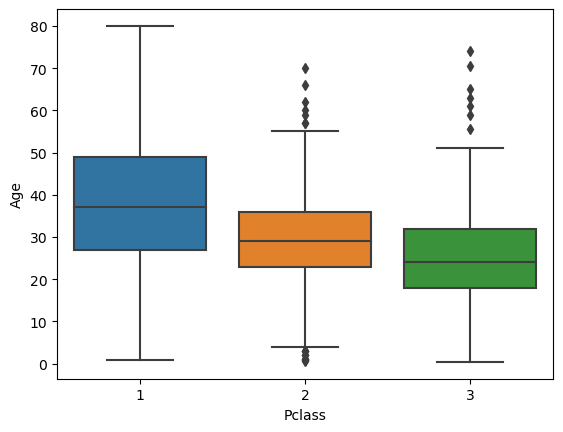

In [20]:
#Passenger Class vs Age
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

# Data Preprocessing

In [21]:
#Train Data
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
pcl = pd.get_dummies(train['Pclass'],drop_first=True)

In [22]:
#Concat new features in train data
train = pd.concat([train,sex,embark,pcl],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,False,True,False,True


In [23]:
#Dropping columns from train dataset
train.drop(['Pclass','Sex','Embarked','Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


In [24]:
train.isnull().sum()

Survived      0
Age         177
SibSp         0
Parch         0
Fare          0
male          0
Q             0
S             0
2             0
3             0
dtype: int64

In [25]:
#Handling NULL values
train_values = {'Age': round(np.mean(train['Age']))}
train = train.fillna(value = train_values)
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


In [26]:
sex = pd.get_dummies(test['Sex'], drop_first = True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
pcl = pd.get_dummies(test['Pclass'],drop_first=True)

In [27]:
#Concat new features in test data
test = pd.concat([test,sex,embark,pcl],axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,True,True,False,False,True
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False,False,True,False,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,True,True,False,True,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,True,False,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False,False,True,False,True


In [28]:
#Dropping columns from train dataset
test.drop(['Pclass','Sex','Embarked','Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)

In [55]:
# Handling NULL values
test['Age'].fillna(value=test['Age'].mean(), inplace=True)
test['Fare'].fillna(value=test['Fare'].mean(), inplace=True)

In [56]:
test.isnull().sum()

Age      0
SibSp    0
Parch    0
Fare     0
male     0
Q        0
S        0
2        0
3        0
dtype: int64

In [64]:
X.columns = X.columns.astype(str)

In [65]:
# Defining features and target variable
X = train.drop('Survived', axis=1)
y = train['Survived']

In [68]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [70]:
# Convert column names to strings
X.columns = X.columns.astype(str)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



In [71]:
# Model training
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [76]:

# Making predictions
predictions = logmodel.predict(X_test)
predictions


array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [74]:

# Model evaluation
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.78
Confusion Matrix:
[[135  18]
 [ 40  75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.81      0.65      0.72       115

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



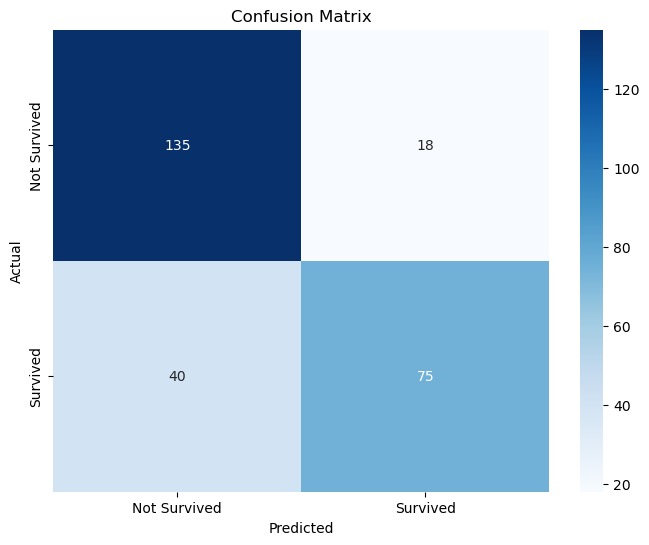

In [75]:

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [86]:
submit = pd.read_csv("gender_submission.csv")
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [92]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [82]:
submit.to_csv("Submission.csv", index=False)